Trabajar con un DataSet artificial para crear un sistema de recomendación para una **agencia de viajes**

In [26]:
import pandas as pd
import numpy as np

df = pd.read_excel(r'C:\Users\Ульяна\Desktop\jupiter\datasets\trips_data.xlsx', index_col=0)
# Сокращаем датасет до 50 строк
df = df.head(300)

# Выводим результат
print(df)

     salary          city  age vacation_preference transport_preference  \
0    196000     Краснодар   25             Шоппинг           Автомобиль   
1    152000  Екатеринбург   60         Архитектура              Самолет   
2     83000         Томск   49         Архитектура           Автомобиль   
3    161000     Краснодар   41             Шоппинг           Автомобиль   
4    146000     Краснодар   58         Архитектура              Самолет   
..      ...           ...  ...                 ...                  ...   
295   70000         Томск   58         Архитектура              Самолет   
296   42000          Киев   58         Архитектура              Самолет   
297   83000     Краснодар   64             Шоппинг              Самолет   
298   23000         Томск   59       Пляжный отдых           Автомобиль   
299   50000         Томск   59         Архитектура    Морской транспорт   

     family_members    target  
0                 1  New York  
1                 1    London  
2  

In [27]:
from googletrans import Translator

def trans(s):
  from googletrans import Translator
  translator = Translator()
  return (translator.translate(s).text)

In [28]:
df.city	

0         Краснодар
1      Екатеринбург
2             Томск
3         Краснодар
4         Краснодар
           ...     
295           Томск
296            Киев
297       Краснодар
298           Томск
299           Томск
Name: city, Length: 300, dtype: object

In [29]:
df.city = df.city.apply(trans)
df.vacation_preference = df.vacation_preference.apply(trans)
df.transport_preference = df.transport_preference.apply(trans)

In [30]:
df

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Krasnodar,25,Shopping,Automobile,1,New York
1,152000,Ekaterinburg,60,Architecture,Airplane,1,London
2,83000,Tomsk,49,Architecture,Automobile,2,Sydney
3,161000,Krasnodar,41,Shopping,Automobile,0,New York
4,146000,Krasnodar,58,Architecture,Airplane,1,Sydney
...,...,...,...,...,...,...,...
295,70000,Tomsk,58,Architecture,Airplane,2,Tokio
296,42000,Kyiv,58,Architecture,Airplane,2,Paris
297,83000,Krasnodar,64,Shopping,Airplane,2,Tokio
298,23000,Tomsk,59,Beach vacation,Automobile,1,Sydney


<Axes: >

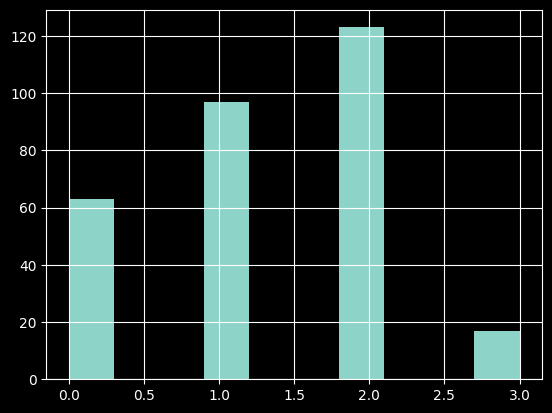

In [31]:
df['family_members'].hist()


In [46]:
df['vacation_preference'].unique()

array(['Shopping', 'Architecture', 'Beach vacation'], dtype=object)

In [45]:
df[df['transport_preference'] == 'Airplane']

,salary,city,age,vacation_preference,transport_preference,family_members,target
1,152000,Ekaterinburg,60,Architecture,Airplane,1,London
4,146000,Krasnodar,58,Architecture,Airplane,1,Sydney
5,209000,Novosibirsk,55,Architecture,Airplane,2,Tokio
8,216000,Tomsk,75,Shopping,Airplane,1,Sydney
10,12000,Kyiv,63,Architecture,Airplane,1,New York
...,...,...,...,...,...,...,...
290,190000,Tomsk,52,Architecture,Airplane,0,Sydney
291,177000,Krasnodar,53,Shopping,Airplane,1,Sydney
295,70000,Tomsk,58,Architecture,Airplane,2,Tokio
296,42000,Kyiv,58,Architecture,Airplane,2,Paris


In [48]:
df[df['vacation_preference'] == 'Beach vacation'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 6 to 298
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   salary                56 non-null     int64 
 1   city                  56 non-null     object
 2   age                   56 non-null     int64 
 3   vacation_preference   56 non-null     object
 4   transport_preference  56 non-null     object
 5   family_members        56 non-null     int64 
 6   target                56 non-null     object
dtypes: int64(3), object(4)
memory usage: 3.5+ KB


In [34]:
df['target'].value_counts()

target
Sydney      69
Paris       67
Tokio       59
London      54
New York    51
Name: count, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   salary                300 non-null    int64 
 1   city                  300 non-null    object
 2   age                   300 non-null    int64 
 3   vacation_preference   300 non-null    object
 4   transport_preference  300 non-null    object
 5   family_members        300 non-null    int64 
 6   target                300 non-null    object
dtypes: int64(3), object(4)
memory usage: 18.8+ KB


<Axes: >

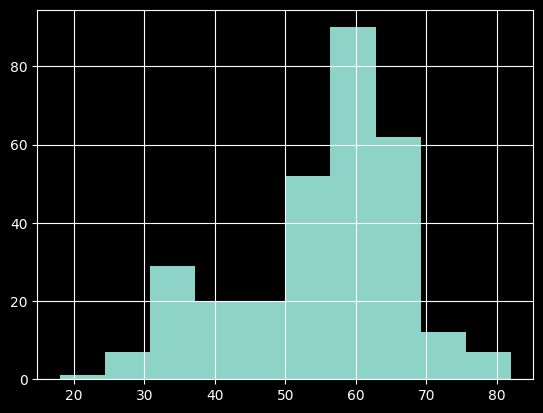

In [36]:
df['age'].hist() 

<Axes: >

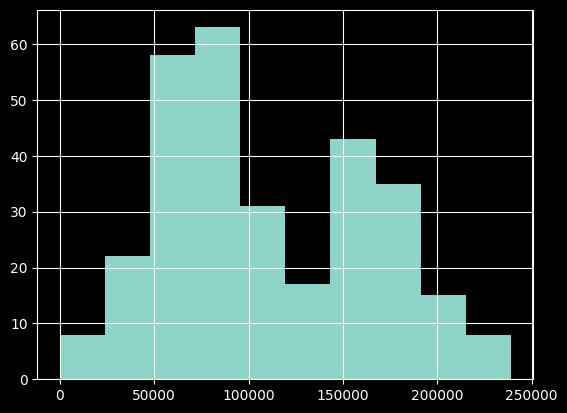

In [37]:
df['salary'].hist() 

In [38]:
df['city'].value_counts()

city
Krasnodar       107
Tomsk            68
Khabarovsk       34
Kyiv             33
Ekaterinburg     22
Omsk             22
Novosibirsk       8
Minsk             5
Yaroslavl         1
Name: count, dtype: int64

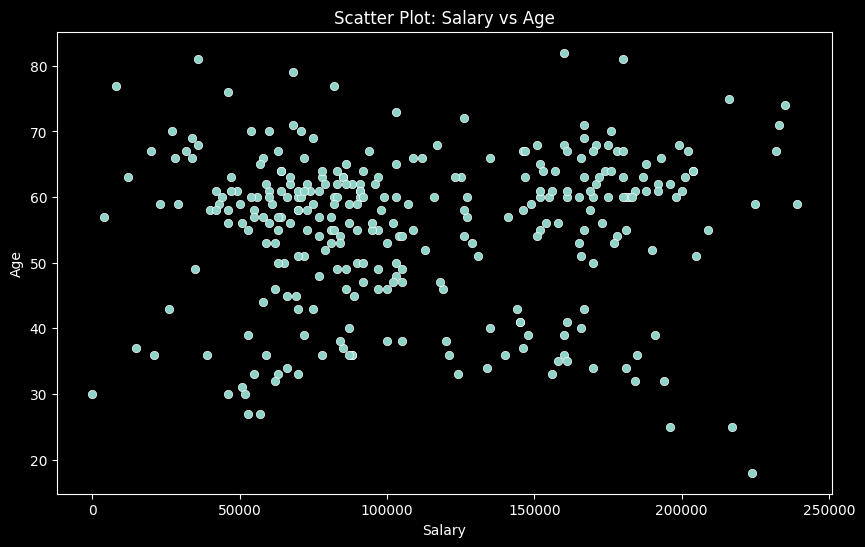

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot between "salary" and "age"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='salary', y='age', data=df)
plt.title('Scatter Plot: Salary vs Age')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.show()

In [40]:
df['city'].unique()

array(['Krasnodar', 'Ekaterinburg', 'Tomsk', 'Novosibirsk', 'Minsk',
       'Khabarovsk', 'Kyiv', 'Omsk', 'Yaroslavl'], dtype=object)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [42]:
df.iloc[[513]] # случайно выбираю подвыроку из датафрейм

IndexError: positional indexers are out-of-bounds

In [ ]:
# создаем копию данных
data = df.copy()

# Предобработка данных для того чтобы переопределить текстовые данные в числа
label_encoder_city = LabelEncoder()
label_encoder_preference = LabelEncoder()
label_encoder_transport = LabelEncoder()

In [ ]:
data['city'] = label_encoder_city.fit_transform(data['city'])
data['vacation_preference'] = label_encoder_preference.fit_transform(data['vacation_preference'])
data['transport_preference'] = label_encoder_transport.fit_transform(data['transport_preference'])

In [ ]:
df.head(5)

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney


In [ ]:
data.head(5)

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,2,25,3,0,1,New York
1,152000,0,60,0,4,1,London
2,83000,8,49,0,0,2,Sydney
3,161000,2,41,3,0,0,New York
4,146000,2,58,0,4,1,Sydney


In [ ]:
label_encoder_city.classes_

array(['Екатеринбург', 'Киев', 'Краснодар', 'Минск', 'Москва',
       'Новосибирск', 'Омск', 'Петербург', 'Томск', 'Хабаровск',
       'Ярославль'], dtype=object)

In [ ]:
# Разделение данных
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

usaremos **RandomForestClassifier**

In [ ]:
# Создание и обучение модели
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

In [ ]:
# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.895


In [ ]:
# Оценка влияния признаков
feature_importances = model.feature_importances_

# Создание DataFrame для наглядности
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Сортировка по убыванию важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Вывод результатов
print("Важность признаков:")
feature_importance_df

Важность признаков:


,Feature,Importance
0,salary,0.265879
2,age,0.219915
5,family_members,0.152805
4,transport_preference,0.140408
3,vacation_preference,0.133496
1,city,0.087497


In [ ]:
# Новые данные для предсказания
new_data = pd.DataFrame({
    'salary': [20000],
    'city': ['Петербург'],
    'age': [73],
    'vacation_preference': ['Пляжный отдых'],
    'transport_preference': ['Самолет'],
    'family_members': [0]
})

In [ ]:
new_data

,salary,city,age,vacation_preference,transport_preference,family_members
0,20000,Петербург,73,Пляжный отдых,Самолет,0


In [ ]:
X_test

,salary,city,age,vacation_preference,transport_preference,family_members
41,100000,2,53,0,0,2
138,146000,9,67,3,4,1
609,179000,5,65,2,4,2
890,54000,9,32,3,0,1
208,100000,8,38,3,3,1
...,...,...,...,...,...,...
682,97000,6,72,0,0,1
765,179000,2,66,0,4,0
384,175000,2,52,3,2,1
945,171000,6,57,2,4,2


In [ ]:
# Предобработка новых данных
new_data['city'] = label_encoder_city.transform(new_data['city'])
new_data['vacation_preference'] = label_encoder_preference.transform(new_data['vacation_preference'])
new_data['transport_preference'] = label_encoder_transport.transform(new_data['transport_preference'])

In [ ]:
new_data

,salary,city,age,vacation_preference,transport_preference,family_members
0,20000,7,73,2,4,0


In [ ]:
predictions = model.predict(new_data)

In [ ]:
model.predict_proba(new_data)

array([[0.29, 0.08, 0.42, 0.14, 0.07]])

In [ ]:
# Вывод результата
print(f"Модель рекомендует отправиться на отдых: {model.predict(new_data)[0]} с вероятностью {model.predict_proba(new_data)[0].max() * 100:.0f}%")

Модель рекомендует отправиться на отдых: Paris с вероятностью 42%


In [ ]:
probabilities = model.predict_proba(new_data)

classes = model.classes_

# Создаем DataFrame
data = {'Class': classes, 'Probability': probabilities[0]}
df = pd.DataFrame(data)

# Выводим DataFrame
df

,Class,Probability
0,London,0.29
1,New York,0.08
2,Paris,0.42
3,Sydney,0.14
4,Tokio,0.07


In [ ]:
df.sort_values(by='Probability', ascending=False, inplace=True)

In [ ]:
import plotly.graph_objects as go

traces = [go.Bar(x=classes, y=probabilities[0])]

fig = go.Figure(data=traces)
fig.show()